### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [39]:
data = pd.read_csv('data/coupons.csv')

In [40]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [41]:
# check the number of rows, columns, dataTypes, also a quick glance at the Number of Non-Null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [42]:
# A better view of the Null-Values
nan_counts = data.isnull().sum()
nan_counts[nan_counts > 0]

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64

In [43]:
for c in data.columns:
    print("\n Columns: ", c)
    print(data[c].unique())


 Columns:  destination
['No Urgent Place' 'Home' 'Work']

 Columns:  passanger
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

 Columns:  weather
['Sunny' 'Rainy' 'Snowy']

 Columns:  temperature
[55 80 30]

 Columns:  time
['2PM' '10AM' '6PM' '7AM' '10PM']

 Columns:  coupon
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']

 Columns:  expiration
['1d' '2h']

 Columns:  gender
['Female' 'Male']

 Columns:  age
['21' '46' '26' '31' '41' '50plus' '36' 'below21']

 Columns:  maritalStatus
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

 Columns:  has_children
[1 0]

 Columns:  education
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']

 Columns:  occupation
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'A

3. Decide what to do about your missing data -- drop, replace, other...

In [44]:
# Since there are significant number of rown with NaN, I decided to keep them. I replaced them to 'unknown'
# in this case All these fielfs were already object type, So replacing them all in one go, works. 
# if we have column with int type we will have to replace them with a number otherwise its datatype 
# will change to object.
data1 = data.fillna('unknown')

4. What proportion of the total observations chose to accept the coupon? 



Accepted:7210 Not Accepted: 5474


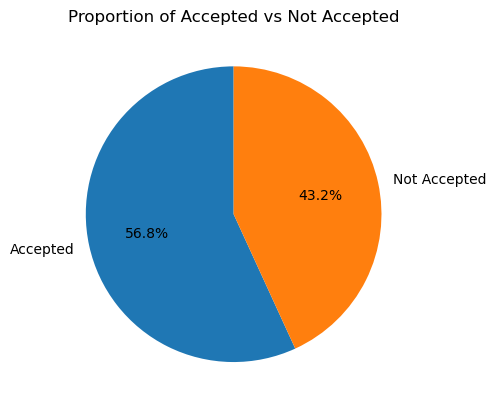

In [45]:
accepted = data1.query('Y == 1').shape[0]
not_accepted = data1.query('Y == 0').shape[0]
print(f'Accepted:{accepted} Not Accepted: {not_accepted}')
accepted_count = data1['Y'].value_counts()
labels = ['Accepted', 'Not Accepted']

#plt.figure(figsize=(5, 5))
plt.title('Proportion of Accepted vs Not Accepted')
plt.pie(accepted_count, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

5. Use a bar plot to visualize the `coupon` column.

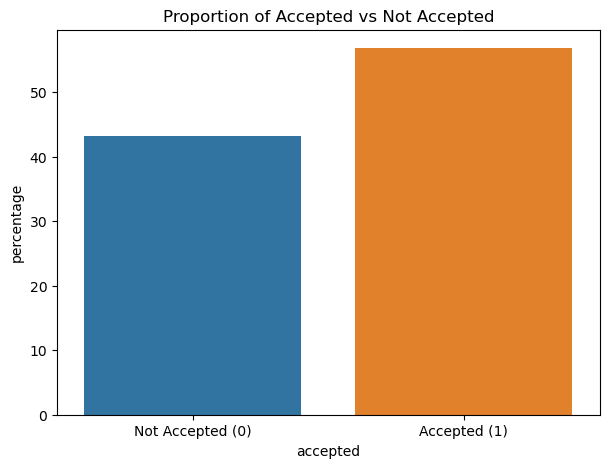

In [46]:
accepted_counts = data1['Y'].value_counts(normalize=True).reset_index()
accepted_counts.columns = ['accepted', 'proportion']
accepted_counts['percentage'] = 100 * accepted_counts['proportion']

plt.figure(figsize=(7, 5))
barplot = sns.barplot(x='accepted', y='percentage', data=accepted_counts, errorbar=None)

for index, row in accepted_counts.iterrows():
    barplot.text(index, row.percentage, '', color='black', ha="center", va="bottom")

plt.title('Proportion of Accepted vs Not Accepted')
plt.xticks(ticks=[0, 1], labels=['Not Accepted (0)', 'Accepted (1)'])
plt.show()

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Coupon acceptence by Temperature')

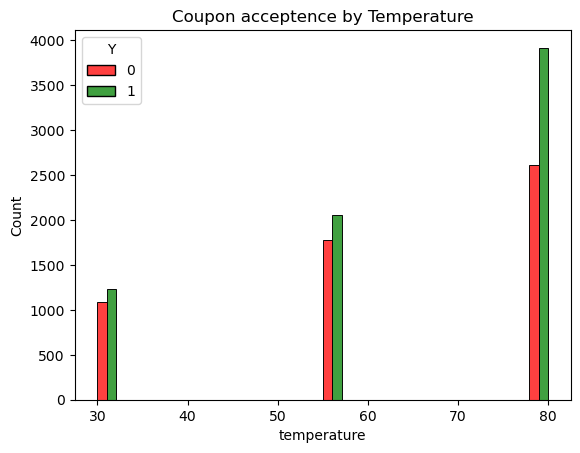

In [63]:
palette = {0: "red", 1: "green"}
sns.histplot(data=data1, x='temperature', hue='Y', palette=palette, multiple='dodge', discrete=False).set_title("Coupon acceptence by Temperature")


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [48]:
df_bar_coupons = data.query('coupon == "Bar"')
df_bar_coupons.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
10960,Home,Partner,Sunny,30,10PM,Bar,2h,Female,31,Married partner,...,less1,gt8,4~8,less1,1,1,1,0,1,0
10118,Work,Alone,Rainy,55,7AM,Bar,1d,Female,36,Married partner,...,4~8,4~8,4~8,1~3,1,1,1,0,1,1
9691,No Urgent Place,Partner,Sunny,55,2PM,Bar,1d,Male,41,Married partner,...,never,gt8,1~3,1~3,1,0,0,0,1,0
61,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,1,0,1,0
5902,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,2h,Female,21,Married partner,...,1~3,1~3,4~8,4~8,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


Text(0.5, 1.0, 'Proportion of Bar coupon acceptence')

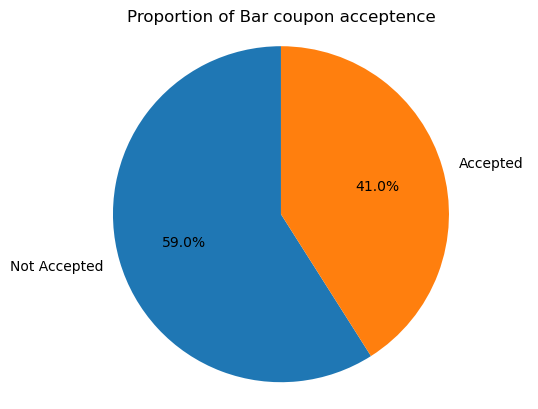

In [55]:
value_counts = df_bar_coupons['Y'].value_counts()

value_to_text = {
    1: 'Accepted',
    0: 'Not Accepted',
}

text_labels = value_counts.index.map(value_to_text)
plt.pie(value_counts, labels=text_labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportion of Bar coupon acceptence')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Text(0.5, 1.0, 'Comparison of Bar visit Vs Bar coupon acceptence')

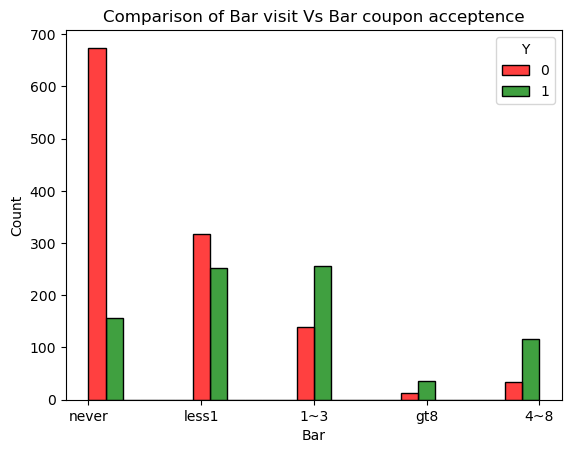

In [62]:
# This one is interesting. People who vists Bar more often, have more acceptence for the Bar coupon.
# which is pretty obvious :) 
palette = {0: "red", 1: "green"}
sns.histplot(data=df_bar_coupons, x='Bar', hue='Y', palette=palette,  multiple='dodge', discrete=False).set_title("Comparison of Bar visit Vs Bar coupon acceptence")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Text(0.5, 1.0, 'go to a bar more than once a month and are over the age of 25 VS others')

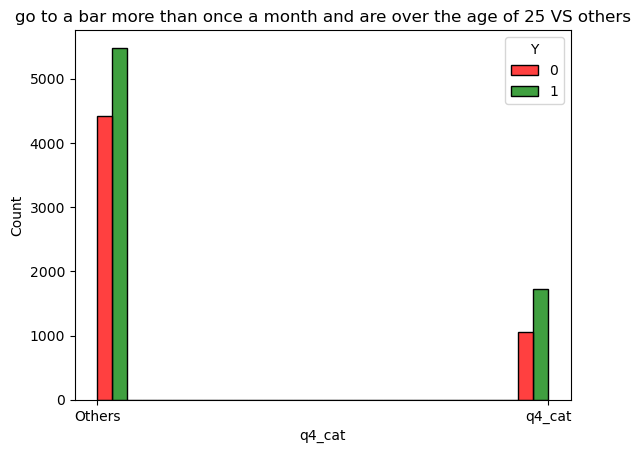

In [113]:
condition1 = data1["Bar"].isin(["1~3", "4~8", "gt8"])
condition2 = ~data1["age"].isin(["below21", "21"])
mask = condition1 & condition2

data1["q4_cat"] = np.where(mask, "q4_cat", "Others")
palette = {0: "red", 1: "green"}
title = "go to a bar more than once a month and are over the age of 25 VS others"
sns.histplot(data=data1, x="q4_cat", hue='Y', palette=palette,  multiple='dodge', discrete=False).set_title(title)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


Text(0.5, 1.0, 'drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry VS Others')

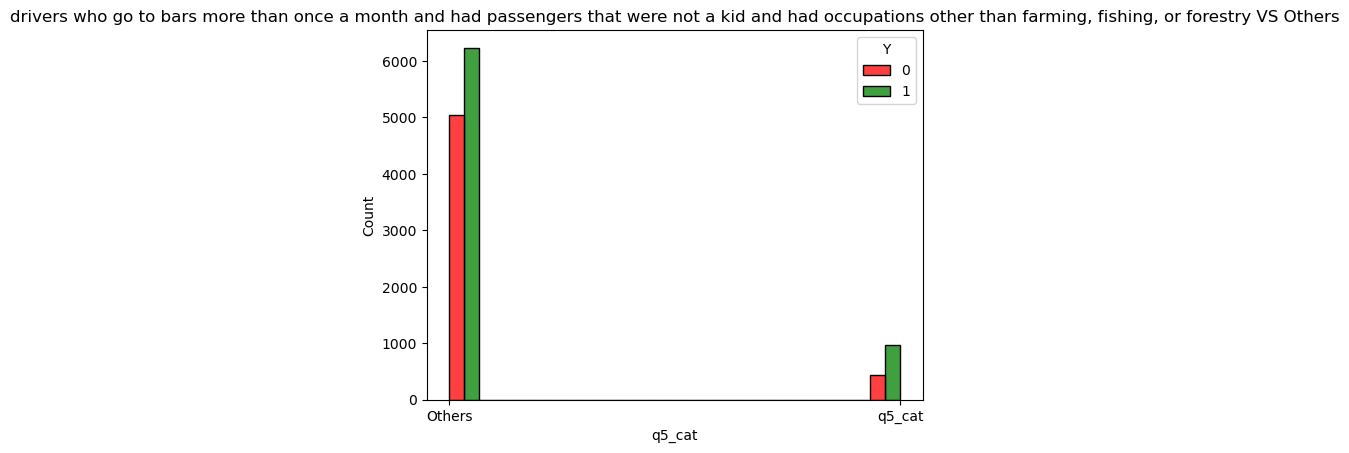

In [115]:
condition1 = data1['Bar'].isin(['1~3', '4~8', 'gt8'])
condition2 = data1["passanger"].isin(['Friend(s)', 'Partner'])
condition3 = ~data1["occupation"].isin(["farming", "fishing", "forestry"])
mask = condition1 & condition2 & condition3

data1['q5_cat'] = np.where(mask, 'q5_cat', 'Others')
palette = {0: "red", 1: "green"}
title = "drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry VS Others"
sns.histplot(data=data1, x='q5_cat', hue='Y', palette=palette,  multiple='dodge', discrete=False).set_title(title)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Text(0.5, 1.0, 'Special category in Question Number 6')

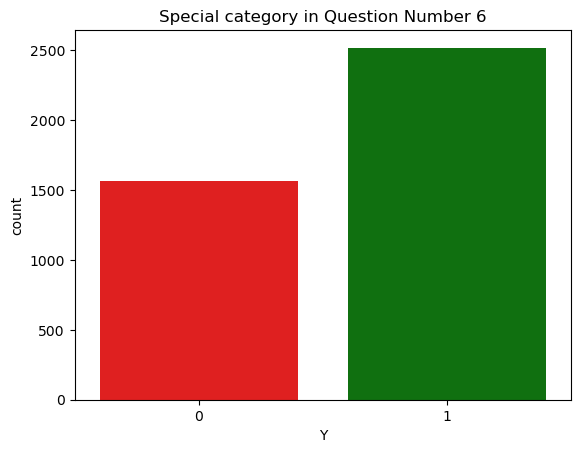

In [124]:
bar_more_than_once = data1['Bar'].isin(['1~3', '4~8', 'gt8'])
non_kid_passenger = data1["passanger"].isin(['Friend(s)', 'Partner'])
not_widowed = ~data1["maritalStatus"].isin(["Widowed"])

under_30 = data1["age"].isin(['21','26','below21'])

cheap_rest_more_than_4_times = data1["RestaurantLessThan20"].isin(['4~8', 'gt8'])
income_less_than_50k = data1["income"].isin(['$37500 - $49999','$12500 - $24999','$25000 - $37499'])

mask = (bar_more_than_once & non_kid_passenger & not_widowed) | (bar_more_than_once & under_30) | (cheap_rest_more_than_4_times & income_less_than_50k)

data6 = data1[mask]
palette = {0: "red", 1: "green"}
title = "Special category in Question Number 6"
sns.countplot(x='Y', data=data6, palette=palette).set_title(title)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [149]:
bar_coupon_df = data1[data1["coupon"] == "Bar"]
palette = {0: "red", 1: "green"}

Text(0.5, 1.0, 'Bar coupon acceptence by Age')

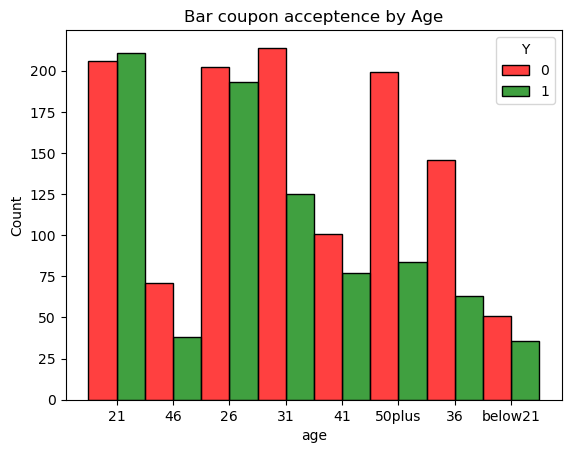

In [150]:
# Around the age of 21 and 26 acceptence rate is almost around 50%, as Age is below or over this range acceptence comes down.
title = "Bar coupon acceptence by Age"
sns.histplot(data=bar_coupon_df, x="age", hue='Y', palette=palette,  multiple='dodge', discrete=True).set_title(title)

Text(0.5, 1.0, 'Bar coupon acceptence by maritalStatus')

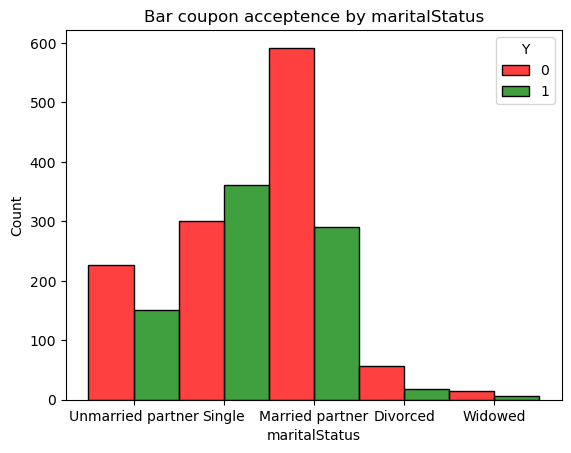

In [152]:
# In Single acceptence rate is high
title = "Bar coupon acceptence by maritalStatus"
sns.histplot(data=bar_coupon_df, x="maritalStatus", hue='Y', palette=palette,  multiple='dodge', discrete=True).set_title(title)

Text(0.5, 1.0, 'Bar coupon acceptence by gender')

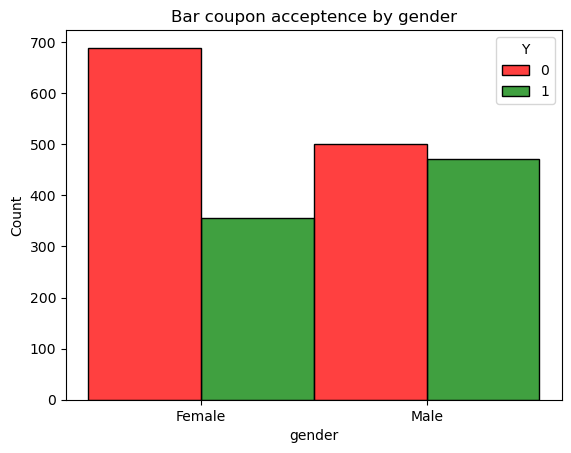

In [154]:
# Acceptance rate is relatively higher in case of Male. 
title = "Bar coupon acceptence by gender"
sns.histplot(data=bar_coupon_df, x="gender", hue='Y', palette=palette,  multiple='dodge', discrete=True).set_title(title)

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [156]:
Carryout_Takeaway_df = data1[data1["coupon"] == "Carry out & Take away"]
palette = {0: "red", 1: "green"}

Text(0.5, 1.0, 'Carry out & Take away coupon acceptence by gender')

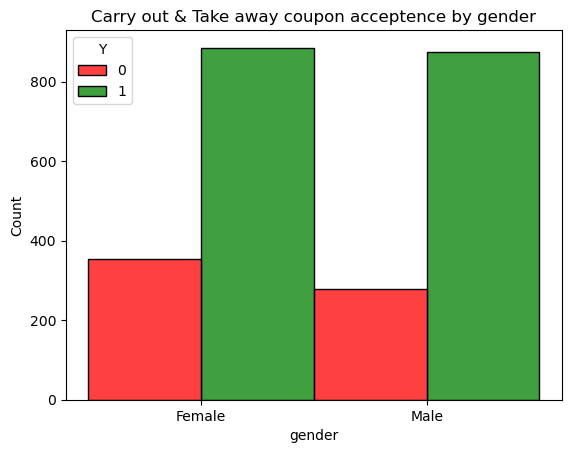

In [157]:
# Acceptance rate is relatively higher in case of Male. 
title = "Carry out & Take away coupon acceptence by gender"
sns.histplot(data=Carryout_Takeaway_df, x="gender", hue='Y', palette=palette,  multiple='dodge', discrete=True).set_title(title)

Text(0.5, 1.0, 'Carry out & Take away coupon acceptence by gender')

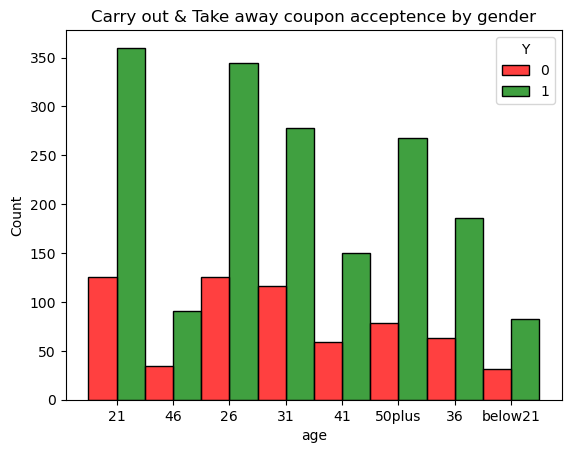

In [158]:
title = "Carry out & Take away coupon acceptence by gender"
sns.histplot(data=Carryout_Takeaway_df, x="age", hue='Y', palette=palette,  multiple='dodge', discrete=True).set_title(title)

# My learning
In this exercise I learnt a lot. 
The data cleanup is really important. Althogh I have not done a great job in this version of the code. I will definitely enhance it. 
- Age columns need to be either converted to int, or a function needs to be written for special comparison which can take care of "less_than_21" and "more_than_50" kind of values
- We can develop a function to draw a "corelation kind of matrix with bar or pie chart for all useful combitions to give us an visual idea of the acceptence rate among different categories of drivers. 